# Hotel Booking Analysis

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

**Explore and analyze the data to discover important factors that govern the bookings.**

In [ ]:
# lets import the libraries required for data analysing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# lets import the data by mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the csv file

file_path ="/content/drive/MyDrive/Colab Notebooks/Hotel Bookings .csv"
hotel_booking_analysis_data = pd.read_csv(file_path)

In [ ]:
# to get the top 5 rows and bottom 5 from the imported data

hotel_booking_analysis_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking_analysis_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# lets get more info about numerical data
hotel_booking_analysis_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# find count of number of rows and columns
hotel_booking_analysis_data.shape

(119390, 32)

From the data we have 119390 rows and 32 columns

In [ ]:
# lets analyze the data basically

hotel_booking_analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Create a copy of the given dataset, so that our original dataset remains unchanged

In [ ]:
# creating the copy of the given data

df = hotel_booking_analysis_data.copy()

In [ ]:
# to find the sum of null rows 

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

 # Data cleaning and handling of missing values

Lets find the percentage of null values present in the dataset

In [ ]:
# Create a function to find percentage of null values present

def percent_missing(df):
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending = False)
    return percent_nan 

In [ ]:
percent_nan = round(percent_missing(df),3)
percent_nan

company     94.307
agent       13.686
country      0.409
children     0.003
dtype: float64

Text(0.5, 0, 'Null value Columns')

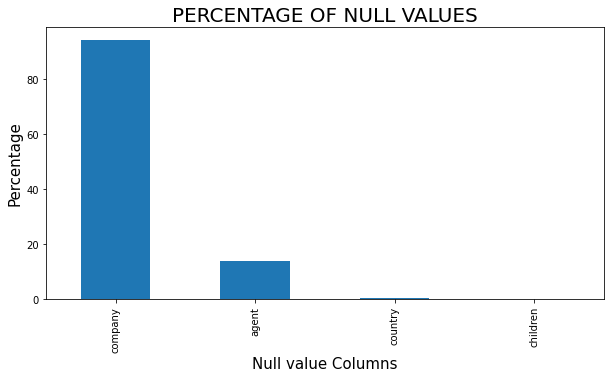

In [ ]:
x = percent_nan.plot(figsize = (10,5) , kind = "bar")
plt.title('PERCENTAGE OF NULL VALUES' , fontsize = 20)
plt.ylabel('Percentage' , fontsize = 15)
plt.xlabel('Null value Columns' , fontsize = 15)

**Inference :** Clearly from the graph company column has got 94% and agent column has got 13% of null values where country and children columns has got less than 1%.

Since the company column has got 94% of the null values it is better to drop out this column

In [ ]:
df.drop(["company"] ,axis = 1, inplace = True)

In [ ]:
df.shape

(119390, 31)

We will fill the agent id with "Agent" and null agent id with "No Agent"

In [ ]:
# First we will fill the agent ids with 'Agent'

df.loc[df.agent.isnull()==False,'agent']='Agent'

In [ ]:
# Now we will fill the null values present in agent ids with 'No agent'

df.agent.fillna('No agent',inplace=True)

In [ ]:
df[["agent"]].head()

,agent
0,No agent
1,No agent
2,No agent
3,Agent
4,Agent


We would fill the missing values in the country coulumns with 'Unknown' since we do not seem to find any references to other columns

In [ ]:
df.country.fillna('Unknown',inplace=True)

In [ ]:
df["country"]

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

We would fill the missing values in the children column with 0

In [ ]:
df.children.fillna(0,inplace=True)

In [ ]:
df[["children"]].astype("int64")

,children
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [ ]:
# lets check again if we have any nulls present in our dataset

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

So now we got all the columns and rows with no null values. 

Now our data is cleaned and missing values has been tackled

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87376 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87376 non-null  object 
 1   is_canceled                     87376 non-null  int64  
 2   lead_time                       87376 non-null  int64  
 3   arrival_date_year               87376 non-null  int64  
 4   arrival_date_month              87376 non-null  object 
 5   arrival_date_week_number        87376 non-null  int64  
 6   arrival_date_day_of_month       87376 non-null  int64  
 7   stays_in_weekend_nights         87376 non-null  int64  
 8   stays_in_week_nights            87376 non-null  int64  
 9   adults                          87376 non-null  int64  
 10  children                        87376 non-null  float64
 11  babies                          87376 non-null  int64  
 12  meal                           

#**Performing EDA**

**Corealtion Heatmap for Numerical Data**

In [ ]:
numerical_df = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


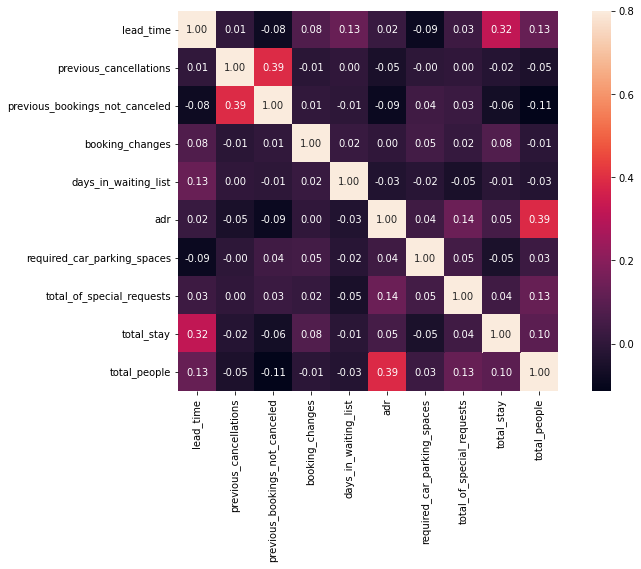

In [ ]:
corrmat = numerical_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);


**Inference :**
1.   adr is slightly correlated with total_people, which makes sense as more number of people means more revenue, therefore more adr.
2. total stay and lead time have slight correlation. This means that for longer hotel stays people generally plan before the actual arrival.



**EDA on arrival period**

1) Arrival period based on Years

In [ ]:
df['arrival_date_year'].value_counts()

2016    42382
2017    31686
2015    13307
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'Number of arrival per Year')

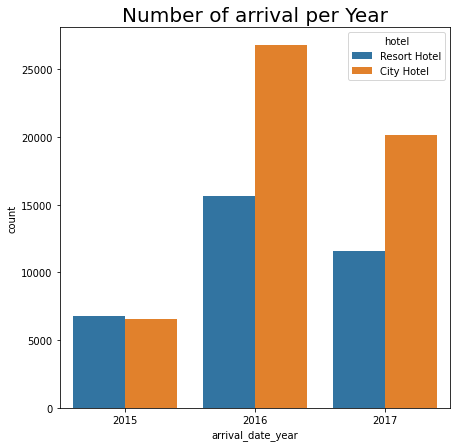

In [ ]:
l = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df[l]
plt.figure(figsize=(7,7))
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel').set_title('Number of arrival per Year',fontsize=20)


**Inference :** In the year 2016 has high amount of arriving peoples

2) Lets see which month has highest arriving month 

In [ ]:
df['arrival_date_month'].value_counts()

August       11254
July         10055
May           8353
April         7907
June          7764
March         7510
October       6934
September     6688
February      6097
December      5129
November      4992
January       4692
Name: arrival_date_month, dtype: int64

Text(0, 0.5, 'Total Count')

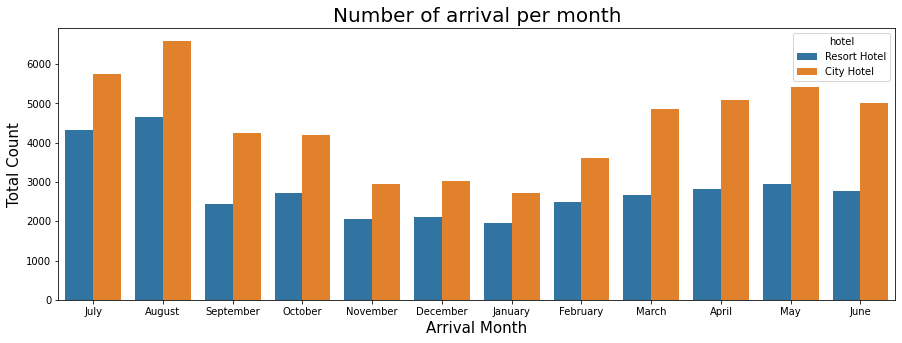

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel').set_title('Number of arrival per month',fontsize=20) 
plt.xlabel('Arrival Month',fontsize = 15)
plt.ylabel('Total Count', fontsize = 15)


**Inference :** Clearly from the graph in the month of August has high period of arrivals, followed by July.... 

3) Similarly lets the the arrivals based on days of months

In [ ]:
df['arrival_date_day_of_month'].value_counts()

17    3019
2     3016
26    3000
5     2979
16    2959
19    2949
28    2929
12    2927
18    2923
11    2915
20    2915
27    2900
29    2880
9     2878
15    2869
25    2837
3     2834
21    2822
13    2812
8     2808
6     2804
4     2799
10    2784
23    2775
24    2774
30    2770
1     2770
7     2702
14    2692
22    2601
31    1733
Name: arrival_date_day_of_month, dtype: int64

Text(0, 0.5, 'Total Count ')

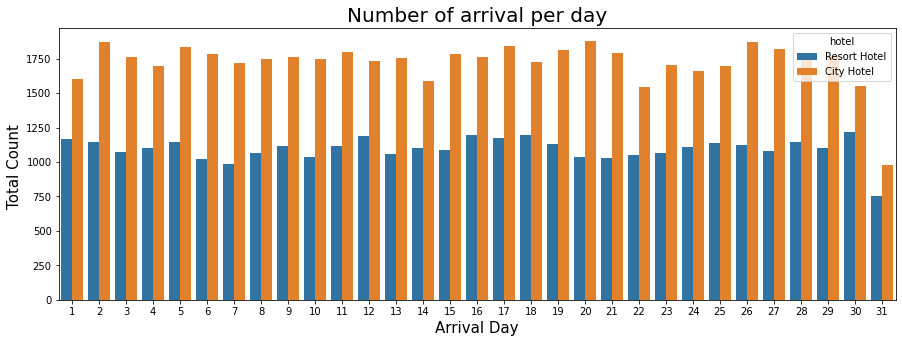

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Number of arrival per day', fontsize = 20)
plt.xlabel('Arrival Day', fontsize = 15)
plt.ylabel('Total Count ',fontsize = 15)

**Inference :** We do notice a roller coaster trend for the arrival day of month. So we cant clearly specify which day has high arrival rate

**EDA Based on Market segment and Distribution channel**

1) Mode of bookings based on Market segment? 

In [ ]:
df['market_segment'].value_counts()

Online TA        51610
Offline TA/TO    13881
Direct           11804
Groups            4941
Corporate         4208
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

Text(0, 0.5, 'Total Count ')

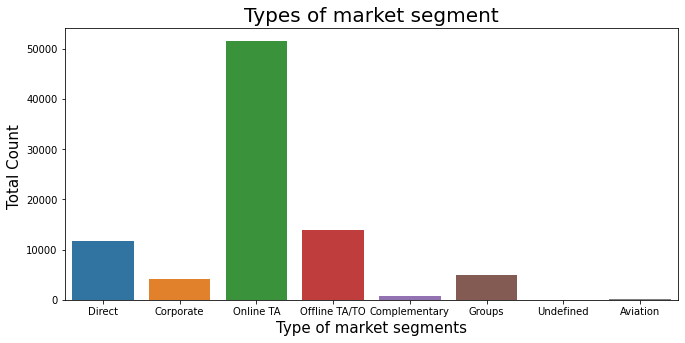

In [ ]:
plt.figure(figsize=(11,5))
sns.countplot(data = df, x = 'market_segment').set_title('Types of market segment', fontsize = 20)
plt.xlabel('Type of market segments', fontsize = 15)
plt.ylabel('Total Count ',fontsize = 15)

**Inference :** Majority booking is done through Online Travel Agencies(TA) 

2) Mode of Distribution Channel

In [ ]:
df['distribution_channel'].value_counts()

TA/TO        69124
Direct       12988
Corporate     5077
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

Text(0, 0.5, 'Total Count ')

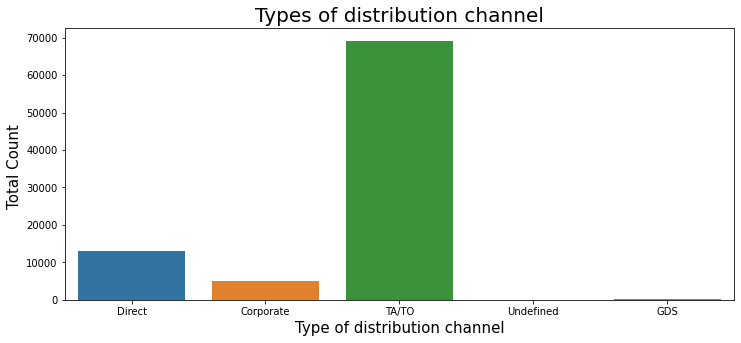

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)
plt.xlabel('Type of distribution channel', fontsize = 15)
plt.ylabel('Total Count ',fontsize = 15)

**Inference :** Distribution channels involve offline TA/TO.
*   We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.




#**Summary**

#**1 .EDA on Corealtion Heatmap for Numerical Data** 

         with a help of importing a seabron plotted a graph

#**2 .EDA on arrival period**

**1) Arrival period based on Years**



1.   performed eda on the most arrival date of the year
2.     Plotting a graph based on arrival date of the year between city hotel and resort hotel



**2) Lets see which month has highest arriving month**

  1.performed eda on the most arrival month

  2.plotting a graph based on number of arrival per month between total count of arrival month





**3) Similarly lets the the arrivals based on days of months**

       1.performed eda on the most arrival based on days of month
       2.plotting a graph based on number of arrival per month between total   count of arrival based on days of month


#**3.EDA Based on Market segment and Distribution channel**

  **1) Mode of bookings based on Market segment**
    

    1.performed eda on the mode of bookings based on market segment
    2.plotting a graph based on number of types of market segment between total cost and types of market segment

**2) Mode of Distribution Channel**

   1. performed eda on Distribution Channel
   2. Plotting a graph on number of types of Distribution channel between total cost and type of Distribution Chaneel